In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 하나씩 잘려진 숫자를 mnist 데이터와 같은 형태로 만들어주는 작업.
def make_binary():
    dir_path = './result'
    sources = []
    for (root, directories, files) in os.walk(dir_path):
        for file in files:
            if '.jpg' in file:
                file_path = os.path.join(root, file)
                sources.append(file_path)

    src = [[] for _ in range(100)]
    index = 0
    temp = sources[0]
    cnt = 0

    while cnt < len(sources):
        if temp[10:-6] == sources[cnt][10:-6]:
            src[index].append(sources[cnt])
            temp = sources[cnt]
            cnt += 1
        else:
            temp = sources[cnt]
            index += 1
    src = list(filter(None, src))

    # for i in src:
    #     print(i)
    # thres = cv2.threshold(img, 10, 10, cv2.THRESH_BINARY)
    # plt.imshow(img, 'gray')
    for data in src:
        nnn = 0
        for index in data:
            original = cv2.imread(index, cv2.IMREAD_GRAYSCALE)
            ret, original = cv2.threshold(original, 120, 255, cv2.THRESH_BINARY)

            N = 10

            original = cv2.resize(original, (N,N))

            for i in range(N):
                for j in range(N):
                    original[i][j] = 255-int(original[i][j])

            bg = np.full((20,20), 255)

            for i in range(N):
                for j in range(N):
                    bg[i+N//2][j+N//2] = original[i][j]
            f_index = 0
            for i in range(len(index)):
                if index[i] == 'f':
                    c_index = i
            fname = './the_end/'+ index[c_index:-6] + '_' + str(nnn) + '.png'
            cv2.imwrite(fname, bg)
            nnn+=1


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10656\3619775698.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(1,1))


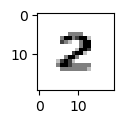

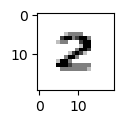

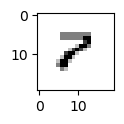

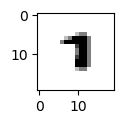

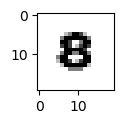

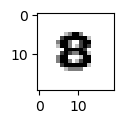

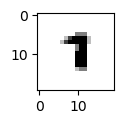

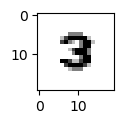

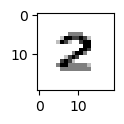

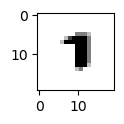

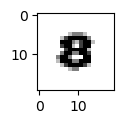

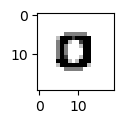

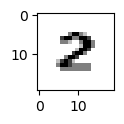

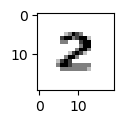

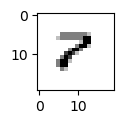

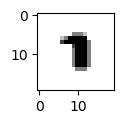

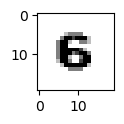

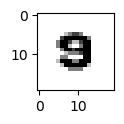

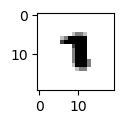

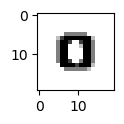

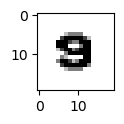

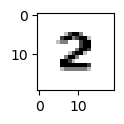

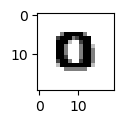

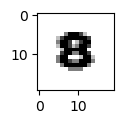

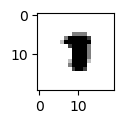

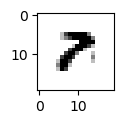

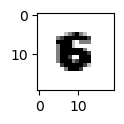

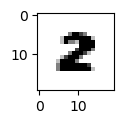

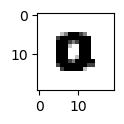

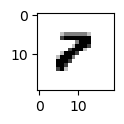

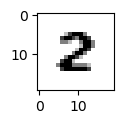

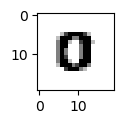

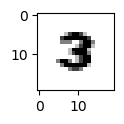

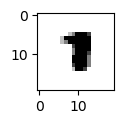

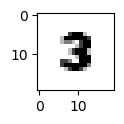

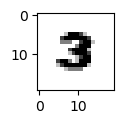

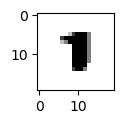

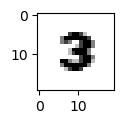

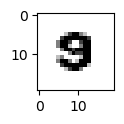

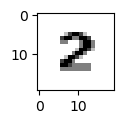

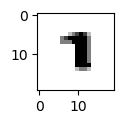

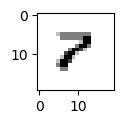

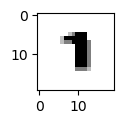

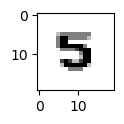

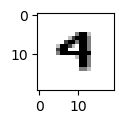

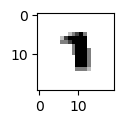

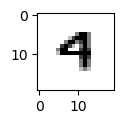

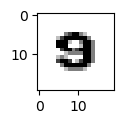

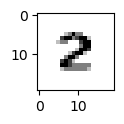

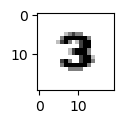

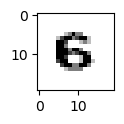

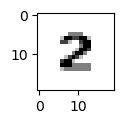

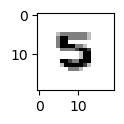

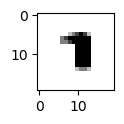

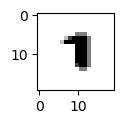

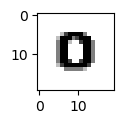

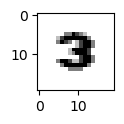

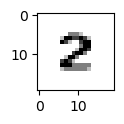

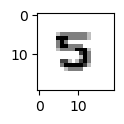

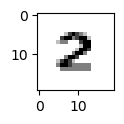

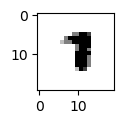

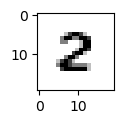

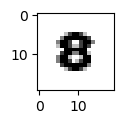

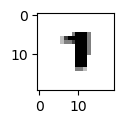

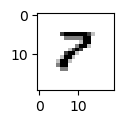

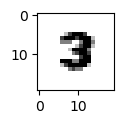

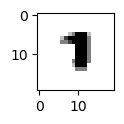

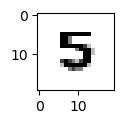

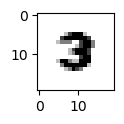

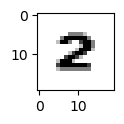

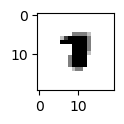

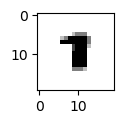

In [10]:
dir_path = './the_end'
sources = []
for (root, directories, files) in os.walk(dir_path):
    for file in files:
        if '.png' in file:
            file_path = os.path.join(root, file)
            sources.append(file_path)
for i in sources:
    img = cv2.imread(i)
    plt.figure(figsize=(1,1))
    plt.imshow(img)
    